In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler,PowerTransformer,QuantileTransformer,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# **Dataset Auto**

In [44]:
dataset = pd.read_csv('/content/drive/My Drive/BCML/datasets/auto.csv')

In [45]:
dataset.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [46]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [47]:
dataset.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
 engine-size           int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

**Data Engineer**

In [48]:
dataset.replace('?',np.nan,inplace=True) 

In [49]:
dataset.isnull().sum().sort_values()

symboling             0
city-mpg              0
compression-ratio     0
fuel-system           0
 engine-size          0
num-of-cylinders      0
engine-type           0
curb-weight           0
highway-mpg           0
width                 0
height                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
aspiration            0
fuel-type             0
make                  0
length                0
num-of-doors          2
horsepower            2
peak-rpm              2
bore                  4
stroke                4
price                 4
normalized-losses    41
dtype: int64

replace data dengan nilai rata-rata:

In [50]:
# cara dengan nan
normalised_mean = dataset['normalized-losses'].astype(float).mean(axis=0)
horsepower_mean = dataset['horsepower'].astype(float).mean(axis=0)
peak_rpm_mean = dataset['peak-rpm'].astype(float).mean(axis=0)
bore_mean = dataset['bore'].astype(float).mean(axis=0)
stroke_mean = dataset['stroke'].astype(float).mean(axis=0)

In [51]:
dataset['normalized-losses'].replace(np.nan,normalised_mean,inplace=True) 
dataset['horsepower'].replace(np.nan,horsepower_mean,inplace=True) 
dataset['peak-rpm'].replace(np.nan,peak_rpm_mean,inplace=True) 
dataset['bore'].replace(np.nan,bore_mean,inplace=True) 
dataset['stroke'].replace(np.nan,stroke_mean,inplace=True) 

In [52]:
# cara lain tanpa nan

# for index in range(len(dataset)):
#   if dataset.loc[index,'normalized-losses'] == '?':
#     df_temp = dataset[dataset['normalized-losses']!='?']
#     normalised_mean = df_temp['normalized-losses'].astype(int).mean()
#     dataset.loc[index,'normalized-losses'] = normalised_mean

#   if dataset.loc[index,'num-of-doors'] == '?':
#     dataset.loc[index,'num-of-doors'] = 'four'

#   if dataset.loc[index,'bore'] == '?':
#     df_temp = dataset[dataset['bore']!='?']
#     normalised_mean = df_temp['bore'].astype(float).mean()
#     dataset.loc[index,'bore'] = normalised_mean

#   if dataset.loc[index,'stroke'] == '?':
#     df_temp = dataset[dataset['stroke']!='?']
#     normalised_mean = df_temp['stroke'].astype(float).mean()
#     dataset.loc[index,'stroke'] = normalised_mean

#   if dataset.loc[index,'horsepower'] == '?':
#     df_temp = dataset[dataset['horsepower']!='?']
#     normalised_mean = df_temp['horsepower'].astype(int).mean()
#     dataset.loc[index,'horsepower'] = normalised_mean
  
#   if dataset.loc[index,'peak-rpm'] == '?':
#     df_temp = dataset[dataset['peak-rpm']!='?']
#     normalised_mean = df_temp['peak-rpm'].astype(int).mean()
#     dataset.loc[index,'peak-rpm'] = normalised_mean
  
#   # if dataset.loc[index,'price'] == '?':
#   #   df_temp = dataset[dataset['price']!='?']
#   #   normalised_mean = df_temp['price'].astype(int).mean()
#   #   dataset.loc[index,'price'] = normalised_mean

In [53]:
dataset.isnull().sum().sort_values()

symboling            0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
 engine-size         0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
highway-mpg          0
num-of-doors         2
price                4
dtype: int64

In [54]:
dataset['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [55]:
dataset['num-of-doors'].replace(np.nan,"four",inplace=True) 

In [56]:
dataset.isnull().sum().sort_values()

symboling            0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
 engine-size         0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
highway-mpg          0
price                4
dtype: int64

In [57]:
dataset.dropna(subset=['price'],inplace=True,axis=0)
dataset.isnull().sum().sort_values()

symboling            0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
 engine-size         0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
highway-mpg          0
price                0
dtype: int64

In [58]:
dataset.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
 engine-size           int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [59]:
dataset[["bore", "stroke","price","peak-rpm"]] = dataset[["bore", "stroke","price","peak-rpm"]].astype("float")
dataset[["normalized-losses","horsepower"]] = dataset[["normalized-losses","horsepower"]].astype("int")
dataset.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
 engine-size           int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdaa66572b0>,
      dtype=object)

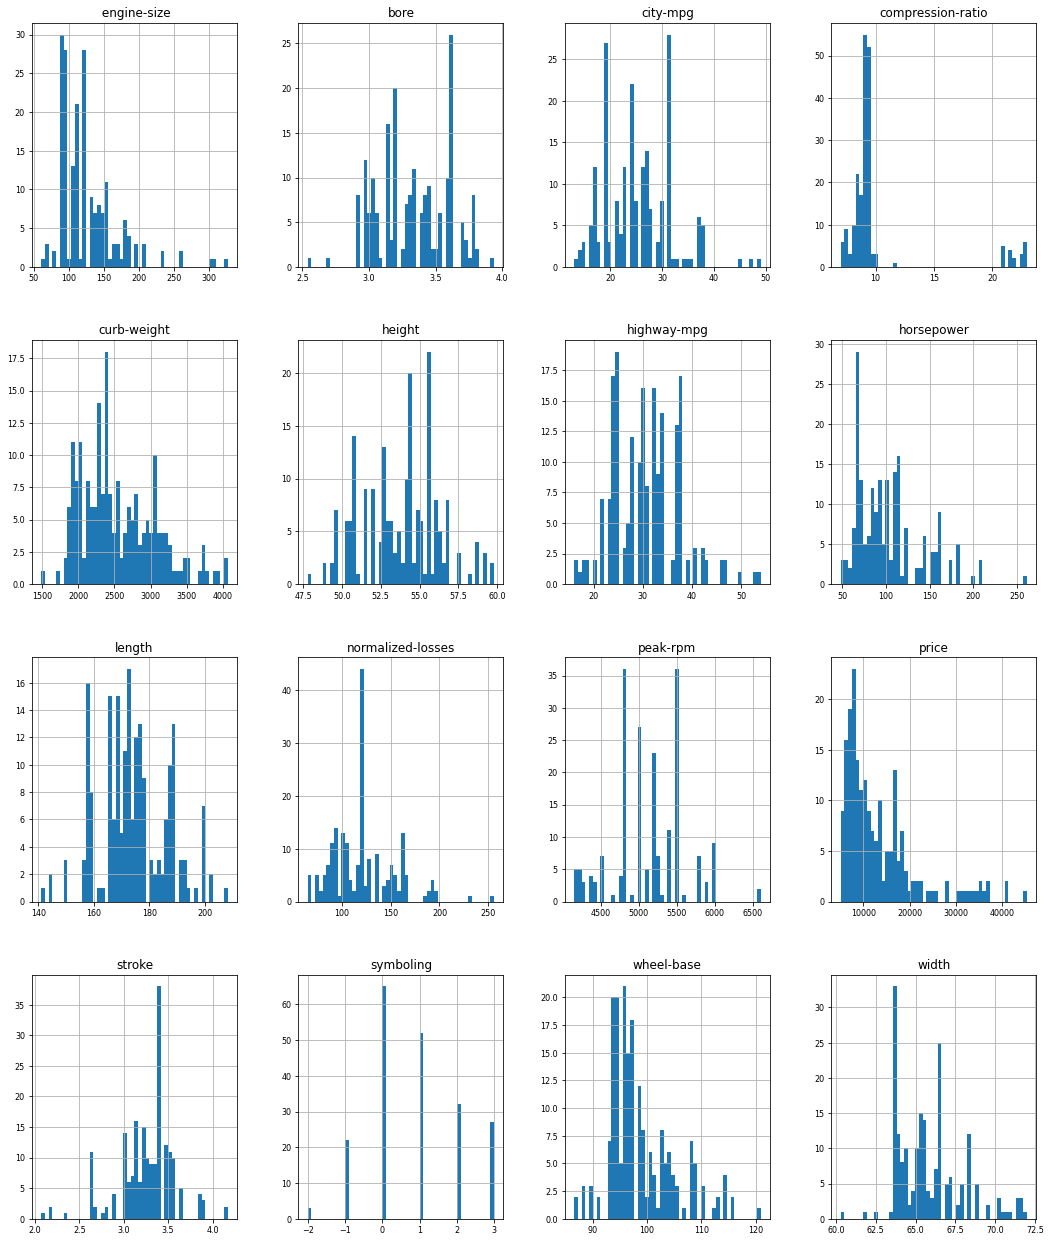

In [60]:
dataset_numbers =dataset.select_dtypes(include=['float','int'])
dataset_numbers.hist(figsize=(18,22),bins=50,xlabelsize=8,ylabelsize=8)

In [61]:
# feature engineering

dataset['City-L/100km']=235/dataset['city-mpg']
dataset['Highway-L/100km']=235/dataset['highway-mpg']

dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,City-L/100km,Highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


In [62]:
dataset.drop(columns=['city-mpg','highway-mpg'],axis=1,inplace=True)
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,City-L/100km,Highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818


In [63]:
# Binning horsepower

dataset.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,City-L/100km,Highway-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,13207.129353,9.944145,8.044957
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,7947.066342,2.534599,1.840739
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,5118.000000,4.795918,4.351852
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7775.000000,7.833333,6.911765
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,10295.000000,9.791667,7.833333
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,16500.000000,12.368421,9.400000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,45400.000000,18.076923,14.687500


In [64]:
bins = np.linspace(min(dataset['horsepower']),max(dataset['horsepower']),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [65]:
group_names=['horsepower_low','horsepower_medium','horsepower_high']
dataset['horsepower_categories']=pd.cut(dataset['horsepower'],bins,labels=group_names,include_lowest=True)
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,City-L/100km,Highway-L/100km,horsepower_categories
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,horsepower_low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,horsepower_low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,horsepower_medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,horsepower_low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,horsepower_low


In [66]:
# one-hot encoding
dataset['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [67]:
fuel_categorized=pd.get_dummies(dataset['fuel-type'])
fuel_categorized

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [68]:
dataset = pd.concat([dataset,fuel_categorized],axis=1)
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,City-L/100km,Highway-L/100km,horsepower_categories,diesel,gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,horsepower_low,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,horsepower_low,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,horsepower_medium,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,horsepower_low,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,horsepower_low,0,1


In [69]:
make_categorized=pd.get_dummies(dataset['make'])
make_categorized

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [70]:
dataset = pd.concat([dataset,make_categorized],axis=1)
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,City-L/100km,Highway-L/100km,horsepower_categories,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,horsepower_low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,horsepower_low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,horsepower_medium,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,horsepower_low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,horsepower_low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
dataset['num-of-cylinders'].value_counts()

four      157
six        24
five       10
eight       4
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [72]:
clean_up_num={
    'num-of-doors':{
        'four':4,
        'two':2
    },
    'num-of-cylinders':{
        'two':2,
        'three':3,
        'four':4,
        'five':5,
        'six':6,
        'eight':8,
        'twelve':12
    }
}

dataset.replace(clean_up_num,inplace=True)
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,City-L/100km,Highway-L/100km,horsepower_categories,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,horsepower_low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,horsepower_low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,122,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,horsepower_medium,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,horsepower_low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,horsepower_low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
dataset.dtypes

symboling                   int64
normalized-losses           int64
make                       object
fuel-type                  object
aspiration                 object
num-of-doors                int64
body-style                 object
drive-wheels               object
engine-location            object
wheel-base                float64
length                    float64
width                     float64
height                    float64
curb-weight                 int64
engine-type                object
num-of-cylinders            int64
 engine-size                int64
fuel-system                object
bore                      float64
stroke                    float64
compression-ratio         float64
horsepower                  int64
peak-rpm                  float64
price                     float64
City-L/100km              float64
Highway-L/100km           float64
horsepower_categories    category
diesel                      uint8
gas                         uint8
alfa-romero   

In [74]:
dataset.drop(['make','fuel-type'],axis=1,inplace=True)

In [75]:
dataset.head()

,symboling,normalized-losses,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,City-L/100km,Highway-L/100km,horsepower_categories,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,horsepower_low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,122,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,horsepower_low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,122,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,horsepower_medium,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,164,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,horsepower_low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,164,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,horsepower_low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
dataset['aspiration'].value_counts()
# body-style,drive-wheels,engine-location,engine-type,fuel-system,horsepower_categories

std      165
turbo     36
Name: aspiration, dtype: int64

In [77]:
aspiration_categorized=pd.get_dummies(dataset['aspiration'])
dataset = pd.concat([dataset,aspiration_categorized],axis=1)
dataset.head()

,symboling,normalized-losses,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,City-L/100km,Highway-L/100km,horsepower_categories,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,std,turbo
0,3,122,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,horsepower_low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,122,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,horsepower_low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,122,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,horsepower_medium,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,164,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,horsepower_low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,164,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,horsepower_low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [80]:
dataset.drop(['aspiration'],axis=1,inplace=True)

In [78]:
body_style_categorized=pd.get_dummies(dataset['body-style'])
body_style_categorized


,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
200,0,0,0,1,0
201,0,0,0,1,0
202,0,0,0,1,0
203,0,0,0,1,0


In [79]:
dataset = pd.concat([dataset,body_style_categorized],axis=1)
dataset.drop(['body-style'],axis=1,inplace=True)
dataset.head()

,symboling,normalized-losses,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,City-L/100km,Highway-L/100km,horsepower_categories,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,std,turbo,convertible,hardtop,hatchback,sedan,wagon
0,3,122,std,2,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,horsepower_low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,3,122,std,2,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,horsepower_low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,1,122,std,2,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,horsepower_medium,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,2,164,std,4,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,horsepower_low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,2,164,std,4,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,horsepower_low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
# aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system,horsepower_categories

In [82]:
drive_wheels_categorized=pd.get_dummies(dataset['drive-wheels'])
drive_wheels_categorized

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
200,0,0,1
201,0,0,1
202,0,0,1
203,0,0,1


In [83]:
dataset = pd.concat([dataset,drive_wheels_categorized],axis=1)
dataset.drop(['drive-wheels'],axis=1,inplace=True)
dataset.head()

,symboling,normalized-losses,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,City-L/100km,Highway-L/100km,horsepower_categories,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd
0,3,122,2,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,horsepower_low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
1,3,122,2,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,horsepower_low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2,1,122,2,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,horsepower_medium,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,2,164,4,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,horsepower_low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4,2,164,4,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,horsepower_low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [84]:
engine_location_categorized=pd.get_dummies(dataset['engine-location'])
engine_location_categorized

,front,rear
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
200,1,0
201,1,0
202,1,0
203,1,0


In [85]:
dataset = pd.concat([dataset,engine_location_categorized],axis=1)
dataset.drop(['engine-location'],axis=1,inplace=True)
dataset.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,City-L/100km,Highway-L/100km,horsepower_categories,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear
0,3,122,2,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,horsepower_low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0
1,3,122,2,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,horsepower_low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0
2,1,122,2,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,horsepower_medium,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
3,2,164,4,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,horsepower_low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0
4,2,164,4,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,horsepower_low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0


In [91]:
engine_type_categorized=pd.get_dummies(dataset['engine-type'])
engine_type_categorized

,dohc,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
200,0,0,1,0,0,0
201,0,0,1,0,0,0
202,0,0,0,0,1,0
203,0,0,1,0,0,0


In [92]:
dataset = pd.concat([dataset,engine_type_categorized],axis=1)
dataset.drop(['engine-type'],axis=1,inplace=True)
dataset.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,City-L/100km,Highway-L/100km,horsepower_categories,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear,dohc,l,ohc,ohcf,ohcv,rotor
0,3,122,2,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,horsepower_low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
1,3,122,2,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,horsepower_low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
2,1,122,2,94.5,171.2,65.5,52.4,2823,6,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,horsepower_medium,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0
3,2,164,4,99.8,176.6,66.2,54.3,2337,4,109,mpfi,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,horsepower_low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0
4,2,164,4,99.4,176.6,66.4,54.3,2824,5,136,mpfi,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,horsepower_low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0


In [93]:
fuel_system_categorized=pd.get_dummies(dataset['fuel-system'])
fuel_system_categorized

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,1,0,0
201,0,0,0,0,0,1,0,0
202,0,0,0,0,0,1,0,0
203,0,0,0,1,0,0,0,0


In [94]:
dataset = pd.concat([dataset,fuel_system_categorized],axis=1)
dataset.drop(['fuel-system'],axis=1,inplace=True)
dataset.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,City-L/100km,Highway-L/100km,horsepower_categories,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear,dohc,l,ohc,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,122,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,horsepower_low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,122,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,horsepower_low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,122,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,horsepower_medium,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2,164,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,horsepower_low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,164,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,horsepower_low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [95]:
horsepower_categories_categorized=pd.get_dummies(dataset['horsepower_categories'])
horsepower_categories_categorized

,horsepower_low,horsepower_medium,horsepower_high
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
200,1,0,0
201,0,1,0
202,0,1,0
203,1,0,0


In [96]:
dataset = pd.concat([dataset,horsepower_categories_categorized],axis=1)
dataset.drop(['horsepower_categories','horsepower'],axis=1,inplace=True)
dataset.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,peak-rpm,price,City-L/100km,Highway-L/100km,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear,dohc,l,ohc,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,horsepower_low,horsepower_medium,horsepower_high
0,3,122,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,5000.0,13495.0,11.190476,8.703704,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,3,122,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,5000.0,16500.0,11.190476,8.703704,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,1,122,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,5000.0,16500.0,12.368421,9.038462,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,2,164,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,5500.0,13950.0,9.791667,7.833333,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,2,164,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,5500.0,17450.0,13.055556,10.681818,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [97]:
dataset.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,peak-rpm,price,City-L/100km,Highway-L/100km,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear,dohc,l,ohc,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,horsepower_low,horsepower_medium,horsepower_high
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,3.144279,98.797015,174.200995,65.889055,53.766667,2555.666667,4.363184,126.875622,3.330692,3.256874,10.164279,5117.665368,13207.129353,9.944145,8.044957,0.099502,0.900498,0.014925,0.029851,0.039801,0.014925,0.044776,0.064677,0.009950,0.014925,0.084577,0.039801,0.004975,0.064677,0.089552,0.054726,0.034826,0.019900,0.009950,0.029851,0.059701,0.159204,0.059701,0.054726,0.820896,0.179104,0.029851,0.039801,0.338308,0.467662,0.124378,0.039801,0.587065,0.373134,0.985075,0.014925,0.059701,0.059701,0.721393,0.074627,0.064677,0.019900,0.054726,0.318408,0.014925,0.099502,0.004975,0.457711,0.044776,0.004975,0.761194,0.213930,0.024876
std,1.254802,31.99625,0.992008,6.066366,12.322175,2.101471,2.447822,517.296727,1.059452,41.546834,0.268072,0.316048,4.004965,478.113805,7947.066342,2.534599,1.840739,0.300083,0.300083,0.121557,0.170600,0.195979,0.121557,0.207328,0.246568,0.099501,0.121557,0.278946,0.195979,0.070535,0.246568,0.286252,0.228013,0.183796,0.140007,0.099501,0.170600,0.237525,0.366780,0.237525,0.228013,0.384397,0.384397,0.170600,0.195979,0.474315,0.500199,0.330836,0.195979,0.493591,0.484845,0.121557,0.121557,0.237525,0.237525,0.449433,0.263444,0.246568,0.140007,0.228013,0.467022,0.121557,0.300083,0.070535,0.499452,0.207328,0.070535,0.427418,0.411102,0.156135
min,-2.000000,65.00000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,4150.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,2.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,4.000000,98.000000,3.150000,3.110000,8.600000,4800.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,122.00000,4.000000,97.000000,173.200000,65.500000,54.1000

# **No. 1**

In [100]:
scale=[StandardScaler(),PowerTransformer(method='yeo-johnson'),QuantileTransformer(n_quantiles=100, random_state=10),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]
# PowerTransformer(method='box-cox'),

for index,value in enumerate(scale):
  scaler = value
  feature_used= dataset.drop(['price'],axis=1)
  label = dataset['price']
  feature_scaled =scaler.fit_transform(feature_used.values)
  feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25,random_state=10)

  Linear_reg = LinearRegression()
  Linear_reg.fit(feature_train, label_train)
  predictions = Linear_reg.predict(feature_test)

  mse = mean_squared_error(label_test, predictions)
  mae = mean_absolute_error(label_test, predictions)
  r2 = r2_score(label_test, predictions)
  print("\n{}".format(value))
  print("MSE (Mean Squared Error)", mse)
  print("MAE (Mean Absolute Error)", mae)
  print("r^2 score", r2)
  print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))


StandardScaler(copy=True, with_mean=True, with_std=True)
MSE (Mean Squared Error) 2.967450187072766e+29
MAE (Mean Absolute Error) 142309670460382.78
r^2 score -6.988806809571441e+21
RMSE (Root Mean Squared Error 544743075869052.8

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
MSE (Mean Squared Error) 7.155215743207271e+31
MAE (Mean Absolute Error) 2210761276020840.8
r^2 score -1.685164614655536e+24
RMSE (Root Mean Squared Error 8458850834012426.0

QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=100,
                    output_distribution='uniform', random_state=10,
                    subsample=100000)
MSE (Mean Squared Error) 6.356801213197735e+32
MAE (Mean Absolute Error) 5485102705147190.0
r^2 score -1.4971255726355663e+25
RMSE (Root Mean Squared Error 2.521269762083727e+16

MinMaxScaler(copy=True, feature_range=(0, 1))
MSE (Mean Squared Error) 1.3376239125048335e+31
MAE (Mean Absolute Error) 782512446541281.2
r^2 score -3.150312395835

Berdasarkan hasil di Atas menunjukan bahwa RobustScaler menunjukan hasil akurasi yang baik dengan r2score nya 0.74

# **No. 2**

In [101]:
scaler = preprocessing.RobustScaler()
feature_used= dataset.drop(['price'],axis=1)
label = dataset['price']
feature_scaled =scaler.fit_transform(feature_used.values)
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25,random_state=10)


 <class 'sklearn.linear_model._base.LinearRegression'>

MSE (Mean Squared Error) 10620904.766815541
MAE (Mean Absolute Error) 2118.9483835801766
r^2 score 0.7498611707738497
RMSE (Root Mean Squared Error 3258.972961964481

 <class 'sklearn.ensemble._forest.RandomForestRegressor'>

MSE (Mean Squared Error) 2832005.1062333337
MAE (Mean Absolute Error) 1199.5911764705882
r^2 score 0.9333018742575466
RMSE (Root Mean Squared Error 1682.856234570658

 <class 'xgboost.sklearn.XGBRegressor'>

MSE (Mean Squared Error) 2963561.181146823
MAE (Mean Absolute Error) 1263.3477424172795
r^2 score 0.9302035240436115
RMSE (Root Mean Squared Error 1721.4996895575737

<class 'sklearn.svm._classes.SVR'> kernel=linear
MSE (Mean Squared Error) = 42342014.47731876 
MAE (Mean Absolute Error) = 4490.6607963919605 
r^2 score  = 0.002779691469842027 
RMSE (Root Mean Squared Error = 6507.07418716882  


<class 'sklearn.svm._classes.SVR'> kernel=poly
MSE (Mean Squared Error) = 48787743.379038446 
MAE (Mean Absolut

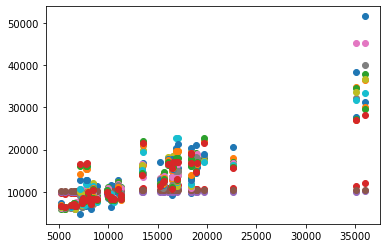

In [102]:
algorithm =[LinearRegression,RandomForestRegressor,xgb.XGBRegressor,SVR,KNeighborsRegressor]
n=[1,3,5,7,9,11,13,15]
kernel=['linear', 'poly', 'rbf']
for index, value in enumerate(algorithm):
  if value == LinearRegression:
    Linear_reg = LinearRegression()
    Linear_reg.fit(feature_train, label_train)
    predictions = Linear_reg.predict(feature_test)
  if value == RandomForestRegressor:
    reg = RandomForestRegressor(max_depth=100, random_state=10)
    reg.fit(feature_train, label_train)
    predictions = reg.predict(feature_test)
  if value == xgb.XGBRegressor:
    xgb_reg = xgb.XGBRegressor(max_depth=3,n_estimators=125,colsample_bytree=1,learning_rate=0.27,objective='reg:squarederror')
    xgb_reg.fit(feature_train, label_train)
    predictions = xgb_reg.predict(feature_test)
  if value == SVR:
    for i,v in enumerate(kernel):
      reggression = SVR(kernel=v)
      reggression.fit(feature_train, label_train)
      predictions = reggression.predict(feature_test)

      mse = mean_squared_error(label_test, predictions)
      mae = mean_absolute_error(label_test, predictions)
      r2 = r2_score(label_test, predictions)
      print('\n{} kernel={}'.format(value,v))
      print("MSE (Mean Squared Error) = {} ".format(mse))
      print("MAE (Mean Absolute Error) = {} ".format(mae))
      print("r^2 score  = {} ".format(r2))
      print('RMSE (Root Mean Squared Error = {}  \n'.format(np.sqrt(mean_squared_error(label_test, predictions))))
      plt.scatter(label_test, predictions)
    continue
  if value == KNeighborsRegressor:
    for i,v in enumerate(n):
      reggression = KNeighborsRegressor(n_neighbors=v)
      reggression.fit(feature_train, label_train)
      predictions = reggression.predict(feature_test)

      mse = mean_squared_error(label_test, predictions)
      mae = mean_absolute_error(label_test, predictions)
      r2 = r2_score(label_test, predictions)
      print('\n{} n_neighbors={}'.format(value,v))
      print("MSE (Mean Squared Error) = {} ".format(mse))
      print("MAE (Mean Absolute Error) = {} ".format(mae))
      print("r^2 score  = {}".format(r2))
      print('RMSE (Root Mean Squared Error = {}\n'.format(np.sqrt(mean_squared_error(label_test, predictions))))
      plt.scatter(label_test, predictions)
    continue

  mse = mean_squared_error(label_test, predictions)
  mae = mean_absolute_error(label_test, predictions)
  r2 = r2_score(label_test, predictions)
  print('\n',value)
  print("\nMSE (Mean Squared Error)", mse)
  print("MAE (Mean Absolute Error)", mae)
  print("r^2 score", r2)
  print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
  plt.scatter(label_test, predictions)

berdasarkan hasil beberapa algoritma di atas di temukan bahwa akurasi tertinggi berada di xgboost dan randomforest yang menyentuh angka 93%